<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu.9.1.logistic.iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 알고리즘 개요
  . 로지스틱 회귀 알고리즘은 회귀 라는 명칭ㅇ르 가지고 있지만, 회귀가 주로 예측을 하는 것과는 달리 정답이 있는 데이터를 사용하여 분류 작업

  . 시그모이드 함수의 출력값을 각 분류 항목에 속하게 될 확률갓으로 사용하여 이 값은 0과 1 사이의 실수

   확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류하는 이진 분류 모델.

   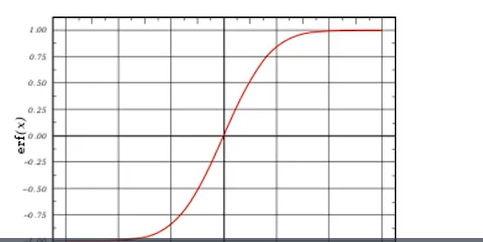

 . 시그모이드 함수 활용.
    출력값은 0 과 1 사이의 실수 이다.  이 분류 항목에 대한 확률값에 따라서 확률에 따라 더 가능성이 더 높은 범주로 판단하는 분류

  .  모양이 S자 모양인데, x 라는 값이 어디에 속하냐에 따라서  0 이냐, 1이냐 로 분류


  . 선형 회귀의 결과를 입력 값으로 받아 특정 레이블로 분류
   . 확률을 0 과 1 사이의 S자형 곡선으로 나타내는 시그모이드 사용.

   . 현재 갖고 있는 데이터를 통해 에러 를 줄이는 방향으로 weight와 bias 의 최적값을 찾아 감.

   . b : bias  (깔려 있는 값),  w : weigh

   . 0 에 가까우면 0, 1에 가까우면 1 로 판단.

   



 0 과 1 이라는 이진으로 출력되는 것을 이해

 로지스틱회귀 함수의 알고리즘을 적용하는 함수 (method)를 알고 이해하는 것이 좋겠다.




[ 접근 방법 ]

   . 로지스트 회귀 알고리즘은 규제 ( ) 의 유형과 강도에 따라 분류의 정확도가 달라지므로, 적절한 값을 찾는 것이 중요

   . 규제가 필요한 이유는 모델이 학습용 데이터만 과도하게 학습한 경우, 이와 다른 데이터에 대하여 예측력이 낮아지는 과대적합 (overfitting)문제가 발생하는 것을 예방하기 위함.

   . 선으로만 그리면  데이터에 따라 왔다 / 갔다 가 될 수 있음.
     적절한 꼬불 하게 그리면 정확도가 높아질 수 있다.  
     너무 꼬불꼬불하게 되면 perforamnce가 떨어지게 된다.
     



  . [규제의 유형 ]
       LOgisticRegression class 내의 **Penalty 매개 변수에서 설정할 수** 있다.
       L2 규제 (릿지 방식) 이 있고, (기본값)
       L1 규제 ( 라쏘 방식) 을 선택할 수도 있다.

  . [ 규제의 강도]
        LogisticRegresion class 내 C 매개변수에서 설정할 수 있으며, 기본값은 1.0 이고, **값이 작아질 수록  규제가 강해 짐. **



1. 필요 PKG import


In [30]:
import numpy as np
import pandas as pd
import sklearn

# 로지스틱 회귀 분류 모델을 위한 패키지 임포트
from sklearn.linear_model import LogisticRegression

# 학습 및 뎉트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

2. DATA 불러오기

In [31]:
# call data
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

3. DATA 탐색

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4. 데이터 전처리

In [34]:
## 정규화를 위해서  MinMaxScaler를 사용해 보자.  ( 각 독립 변수별로 Min Max 정규화)
## Min - Max 정규화 ? 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 의미합니다. 값을 조정하는 과정이기 때문에 수치형 변수에만 적용해야 합니다
##  fit ()
##  transform()
##  fit_tranform ( )  // 2개 동시에 진행하는 것.


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["sepal_length"]] = scaler.fit_transform(df[["sepal_length"]])
df[["sepal_width"]] = scaler.fit_transform(df[["sepal_width"]])
df[["petal_length"]] = scaler.fit_transform(df[["petal_length"]])
df[["petal_width"]] = scaler.fit_transform(df[["petal_width"]])



데이터 스케일링
데이터 스케일링(Data Scaling)이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 의미합니다. 값을 조정하는 과정이기 때문에 수치형 변수에만 적용해야 합니다.

사이킷런에서는 스케일링을 수행하기 위한 다양한 스케일러를 제공하는데요.
이때 모든 스케일러는 공통적으로 다음과 같은 메서드를 이용합니다.

fit(): 데이터 변환을 위한 기존 정보 설정 (ex: 데이터 세트의 최댓값/최솟값)
transform(): fit()을 통해 설정된 정보를 이용해 실제로 데이터를 변환
그리고 fit_transform()은 위 두 가지 메서드를 한 번에 적용하는 기능을 수행합니다.


우선, 스케일링의 대표적인 방법인 표준화(Standardization)와 정규화(Normalization)를 살펴보겠습니다.



✅ 표준화
▶ 개념
표준화(Standardization)는 변수 각각의 평균을 0, 분산을 1로 만들어주는 스케일링 기법입니다. 표준화가 적용된 변수는 가우시안 정규분포를 가진 값으로 변환됩니다.

아래 수식과 같이, 변수 x의 원래 값에서 x의 평균을 뺀 값을 x의 표준편차로 나눈 값으로 계산할 수 있습니다.


💻 실습
표준화를 위해, 사이킷런에서는 StandardScaler를 제공합니다. 이는 표준화를 쉽게 지원하기 위한 클래스로, 개별 변수를 평균이 0이고 분산이 1인 값으로 변환해줍니다.

표준화를 위해 사이킷런의 StandardScaler 클래스를 사용합니다.
fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
다음과 같은 타이타닉 데이터의 "Age", "Fare" 변수에 표준화를 적용해보겠습니다.

Age	Fare
22.0	7.2500
38.0	71.2833
26.0	7.9250
35.0	53.1000
35.0	8.0500
...	...
코드
# train 데이터의 수치형 컬럼을 추출해서 train_X_num이라는 객체에 저장합니다.
train_X_num = train[['Age', 'Fare']]
# scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체를 생성합니다.
standard_scaler = StandardScaler()

# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
train_standard = standard_scaler.fit_transform(train_X_num)
# 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
train_standard = pd.DataFrame(train_standard,
                              index=train_X_num.index,
                              columns=train_X_num.columns)
# 표준화가 잘 되었는지 데이터를 확인해봅시다.
train_standard.head()

다음과 같이 표준화가 잘 적용되었음을 확인할 수 있습니다.

Age	Fare
-0.530377	-0.502445
0.571831	0.786845
-0.254825	-0.488854
0.365167	0.420730
0.365167	-0.486337


✅ 정규화
▶ 개념
정규화(Normalization)는 일반적으로 서로 다른 변수의 크기를 통일하기 위해 크기를 변환해주는 개념입니다.

아래 수식과 같이, 변수 x의 원래 값에서 x의 최솟값을 뺀 값을 x의 최댓값과 최솟값의 차이로 나눈 값으로 계산할 수 있습니다.


▶ 예시
예를 들어 아래와 같이 두 변수가 있다고 가정해보겠습니다.

변수 A: 거리를 나타내는 변수로서 값이 0 ~ 200KM로 주어짐
변수 B: 금액을 나타내는 변수로서 값이 0~200,000,000원으로 주어짐

정규화란 이 변수들을 모두 동일한 크기 단위로 비교하기 위해, 값을 모두 0에서 1 사이로 변환하는 것입니다.

▶ 특징
① 정규화를 통해 변수들이 평등하게 0~1 사이에 놓이게 되면, 모델은 어느 특정 변수에 중점을 두기보다는 변수들을 평등하게 바라보고 학습을 진행하게 됩니다.

② MinMaxScaler는 타이타닉 생존자 예측(0 또는 1)과 같은 분류 문제보다는,
아파트 실거래가격 예측과 같은 회귀 문제를 해결할 때 더 적합한 스케일링 기법입니다.

💻 실습
사이킷런의 MinMaxScaler는 데이터 값을 0과 1 사이로 변환해줍니다.
(만약 음수 값이 있으면 -1에서 1 값으로 변환합니다.)

데이터의 값을 0~1 사이로 변환하기 위해, MinMaxScaler 클래스를 사용합니다.
fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
이번에는 "Age", "Fare" 변수에 MinMax 스케일링을 적용해보겠습니다.

코드
# train 데이터의 수치형 컬럼을 추출해서 train_X_num이라는 객체에 저장합니다.
train_X_num = train[['Age', 'Fare']]
# scikit-learn 패키지의 MinMaxScaler 클래스를 불러옵니다.
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체를 생성합니다.
minmax_scaler = MinMaxScaler()

# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
train_minmax = minmax_scaler.fit_transform(train_X_num)
# Min-Max 스케일링이 완료된 데이터를 데이터프레임 형태로 변환합니다.
train_minmax = pd.DataFrame(train_minmax,
                            index=train_X_num.index,
                            columns=train_X_num.columns)
# 스케일링이 잘 되었는지 데이터를 확인해봅시다.
train_minmax.head()

다음과 같이 수치형 변수들의 값이 0~1 사이로 잘 변환되었음을 확인할 수 있습니다.

Age	Fare
0.271174	0.014151
0.472229	0.139136
0.321438	0.015469
0.434531	0.103644
0.434531	0.015713


✅ 로버스트
표준화, 정규화 이외에도 로버스트 스케일링이라는 기법이 존재합니다.

▶ 개념
로버스트(Robust)는 데이터의 중앙값 = 0, IQR = 1이 되도록 스케일링하는 기법입니다.

아래 수식과 같이, 변수 x의 원래 값에서 x의 중앙값을 뺀 값을 x의 제3사분위수(Q3)와 제1사분위수(Q1)의 차이를 나눈 값으로 계산할 수 있습니다.


▶ 특징
RobustScaler를 사용하면 모든 변수들이 같은 스케일을 갖게 되며, StandardScaler에 비해 스케일링 결과가 더 넓은 범위로 분포하게 됩니다.

따라서 StandardScaler에 비해 이상치의 영향이 적어진다는 장점이 있습니다.

💻 실습
RobustScaler 클래스를 사용합니다.
fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
이번에는 "Age", "Fare" 변수에 Robust 스케일링을 적용해보겠습니다.

코드
# train 데이터의 수치형 컬럼을 추출해서 train_X_num이라는 객체에 저장합니다.
train_X_num = train[['Age', 'Fare']]
# scikit-learn 패키지의 RobustScaler 클래스를 불러옵니다.
from sklearn.preprocessing import RobustScaler
# RobustScaler 객체를 생성합니다.
robustScaler = RobustScaler()

# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
X_train_robust = robustScaler.fit_transform(train_X_num)
# robust 스케일링이 완료된 데이터를 데이터프레임 형태로 변환합니다.
train_robust = pd.DataFrame(X_train_robust,
                            index=train_X_num.index,
                            columns=train_X_num.columns)


🔎 스케일링할 때 주의할 점
위에서 언급했듯이 사이킷런의 모든 스케일러는 공통적으로 다음과 같은 메서드를 이용하며, fit_transform()은 이 두 가지 메서드를 한 번에 적용하는 기능을 수행합니다.

fit(): 데이터 변환을 위한 기존 정보 설정 (ex: 데이터 세트의 최댓값/최솟값)
transform(): fit()을 통해 설정된 정보를 이용해 실제로 데이터를 변환
그런데 메서드들을 사용할 때 주의해야 할 점!이 있습니다.

학습 데이터로 fit()과 transform()을 적용하면, 테스트 데이터로는 다시 fit()을 수행하지 않고 학습 데이터로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것입니다.

즉 테스트 데이터에 다시 fit()을 적용해서는 안 되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 합니다.

이렇게 하지 않으면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수도 있습니다 😥


정리하자면 다음과 같습니다.

테스트 데이터에는 이미 학습 데이터로 fit()이 수행된 Scaler 객체를 이용해 transform()으로 변환해야 합니다.

(출처: https://velog.io/@jiazzang/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81StandardScaler-MinMaxScaler-Robust)

In [35]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


[도전과제]
 위 결과에서 Species 를   Data Labelling Encoding 또는 one-Hot- Encdoing으로 분리해서 해 보는 것도 좋겠다.

In [36]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


정규화를 한 후에  describe ()로 data를 조사하면  min, max의 값이 0과 1로 변한것을 알 수 있다.

In [37]:

## 분석 data set 준비
## X는 독립 변수, y는 종속 변수


X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df[["species"]]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


6. 분석 및 예측

In [39]:
## DATA 분석 실행

In [48]:
#logisticRegression 객체 생성
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
pred = lr.predict(X_test)

7. 성능 평가 및 시각화

In [42]:
from sklearn.metrics import accuracy_score    ## 정확도
acc = accuracy_score(y_test, pred)
print(acc)

0.8333333333333334


In [43]:
## 모델 선능 평가.  CONFUSION MATRIX

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
print(mat)

[[9 0 0]
 [0 7 3]
 [0 2 9]]


In [45]:
## 모델 성능 평가 - 평가 지표 계산

In [46]:
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      0.70      0.74        10
   virginica       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.83      0.83      0.83        30



In [47]:
## 위 결과를 보면... setosa f1-score 값이 좋음 (value 1 )
## versicolor, virginica 에 대해서는 0.7, 0.8 정도로 약간 떨어진다.
## setosa는 매우 신뢰 있다.
## accurary는 0.83

## KNN 알고 리즘으로 동일하게 분석 해 봤다.
## 분석을 수생하는 것만 다르다.
## 성능 평가도 동일하다.
## 오히려 KNN이 0.93 으로 더 높다.
## 여러개의 알고리즘을 사용할 수 있다.  ( 왜 차이가 나는가?  모아진 data에 따라서 차이가 있다.)